### Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lib.utils import read_all_file
import os

### Đọc dữ liệu sharers

Tất cả dữ liệu về các người đã share bài post lưu trong file csv bắt đầu với chuỗi 'sharers_'

In [4]:
num_file, sharer_df = read_all_file(
    folder_path=os.path.join('data', 'vebay69', 'raw'),
    prefix = 'sharers_',
    suffix = '.csv',
)
num_file

28

In [6]:
sharer_df.head()

,name,link,post_id
0,Trong Huy Bui,https://facebook.com/profile.php?id=1000895265...,617018593866682
1,Long Dinh,https://facebook.com/profile.php?id=1000571749...,617018593866682
2,Subhajit Das Subhajit,https://facebook.com/subhajitdas.subhajit.7?ea...,617018593866682
3,Kiều Minh Thu,https://facebook.com/profile.php?id=1000918233...,617018593866682
4,Anh Khoa La,https://facebook.com/profile.php?id=1000901434...,617018593866682


In [7]:
sharer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     18866 non-null  object
 1   link     18866 non-null  object
 2   post_id  18866 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 442.3+ KB


### Kiểm tra sự mất mát dữ liệu

In [8]:
missing_data = []
percentage_data = []

for i in sharer_df.columns:
    missing_count = sharer_df[i].isnull().sum()
    percentage = missing_count / len(sharer_df) * 100
    missing_data.append(missing_count)
    percentage_data.append(percentage)

data = {'Columns': sharer_df.columns, 'Missing Data': missing_data, 'Missing Percentage': percentage_data}
df_summary = pd.DataFrame(data)
df_summary['Missing Percentage'] = df_summary['Missing Percentage'].round(2)
df_summary

,Columns,Missing Data,Missing Percentage
0,name,0,0.0
1,link,0,0.0
2,post_id,0,0.0


Biểu đồ heatmap để visualize dữ liệu mất mát

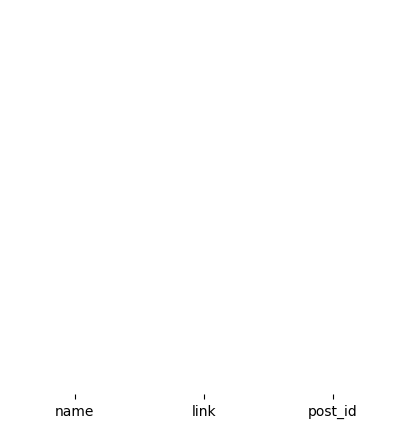

In [9]:
plt.figure(figsize=(5, 5))
sns.heatmap(sharer_df.isnull(), cbar=False, cmap='binary', yticklabels=False);